# Airbnb Pricing Predictions 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, mode, median
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF','#67E568','#257F27','#08420D','#FFF000','#FFB62B','#E56124','#E53E30','#7F2353','#F911FF','#9F8CA6']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_style('darkgrid')

np.random.seed(sum(map(ord, "aesthetics")))

# Import Data

In [3]:
np.random.seed(0) #seed is set to 0 to ensure consistency throughout the notebook
data = pd.read_csv('Datasets/train.csv', index_col='Id')
data_kaggle = pd.read_csv('Datasets/test.csv', index_col='Id')

# Exploratory Data Analysis (EDA): Correlation Matrix

Correlation matrix is used to see correlations between predictors on Train Data. This correlation matrix only shows linear relationships among predictors

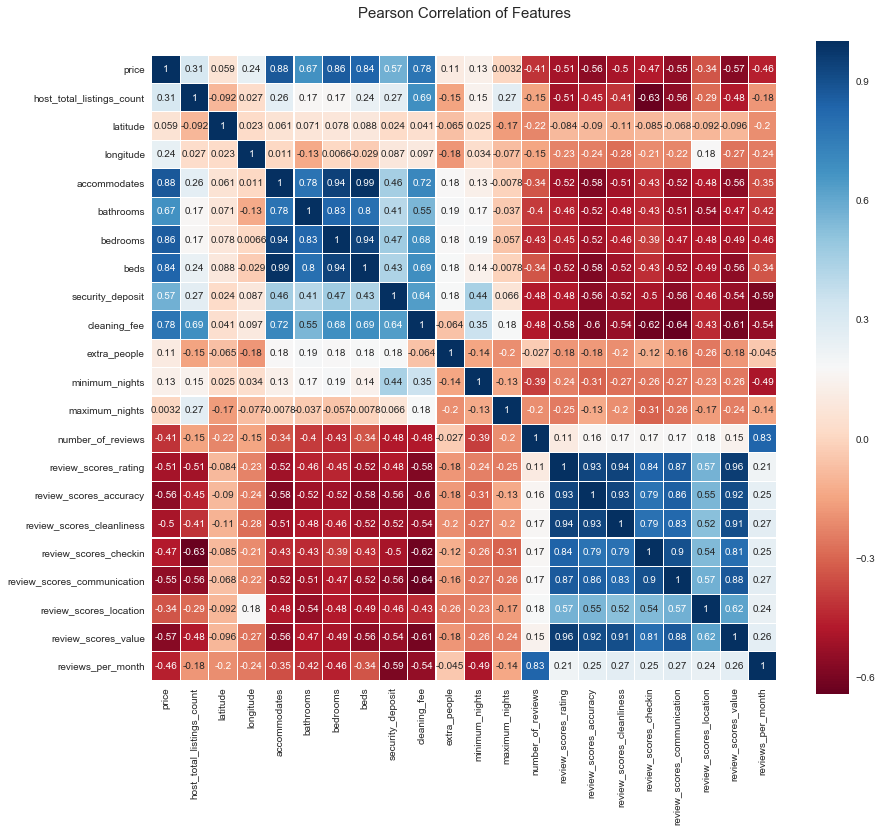

In [4]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
corr01 = data.corr()
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr01.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# EDA: Variable Distribution: price

This EDA depicts the distribution of price variable. Histogram was given below with additional standard normal distribution as a comparison. The output indicates non-normality on price.


 mu = 145.52 and sigma = 91.38



Text(0.5,1,'Price Distribution')

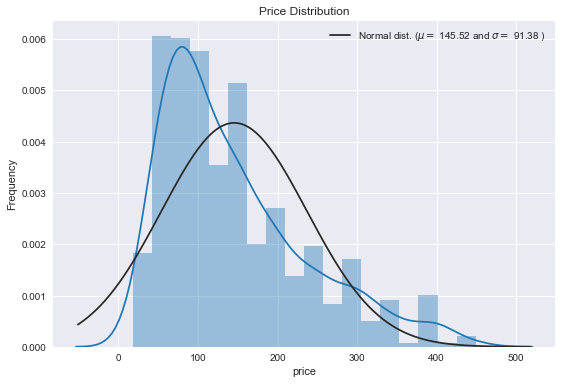

In [5]:
sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price Distribution')

Additional information such as skewness, kurtosis, QQ plot and Jarque Berra test were given below to verify the visual interpretation. The data is positively skewed and has excess kurtosis of 0.5. JB test also returned a low p-value that rejected the normality assumption

In [6]:
skew(data['price'])

1.0826879445506747

In [7]:
kurtosis(data['price'], fisher=False)

3.5513496902120836

In [8]:
stats.jarque_bera(data['price'])
#p-value is 0.000 meaning reject Ho

(208.03496758326756, 0.0)

QQplot shows that the data is not following a straight line which indicate a non normality. 

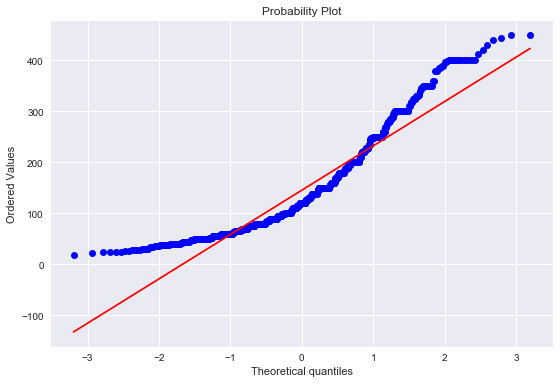

In [9]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

The target variable is right skewed. This suggests this variable needs to be log transformed to normalise the distribution. Variable transformation will be conducted in the later part on this notebook.

# EDA: Plotting

This EDA draws the relationships between price and other predictors through various plotting diagrams

The visual representatives of some predictors as shown below indicate a non linear relationship with price.

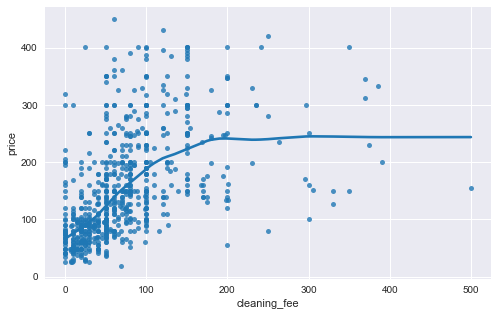

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(data['cleaning_fee'], data['price'],  scatter_kws = {'s': 25}, lowess=True)
sns.despine()
fig.show()

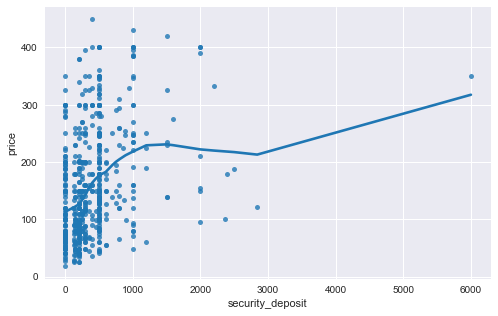

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(data['security_deposit'], data['price'],  scatter_kws = {'s': 25}, lowess=True)
sns.despine()
fig.show()

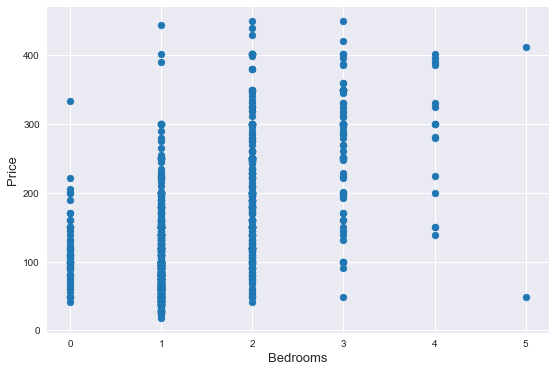

In [12]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = data['bedrooms'], y = data['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bedrooms', fontsize=13)
plt.show()

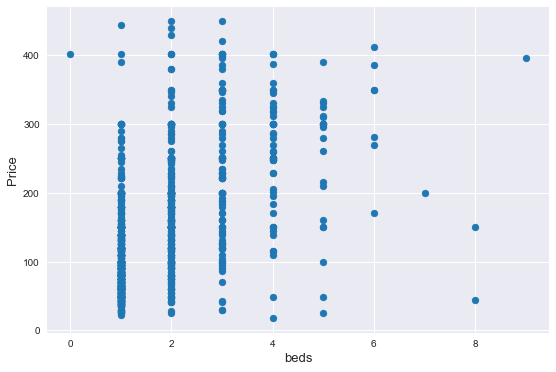

In [13]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = data['beds'], y = data['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('beds', fontsize=13)
plt.show()

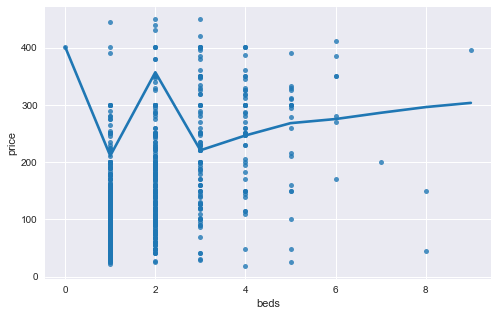

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(data['beds'], data['price'],  scatter_kws = {'s': 25}, lowess=True)
sns.despine()
fig.show()

Swarmplot was used to show the imbalance sample size and to give some indication of the properties of the data inside each class within the categorical predictors

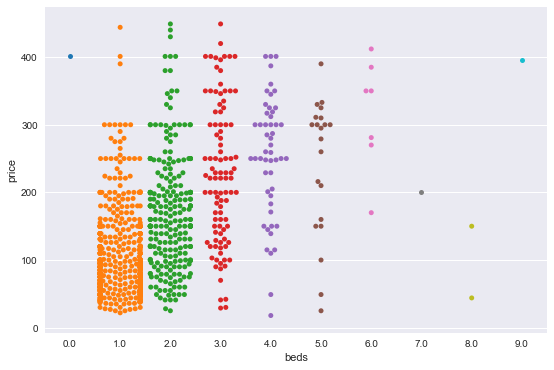

In [15]:
sns.swarmplot(x="beds", y="price", data = data)

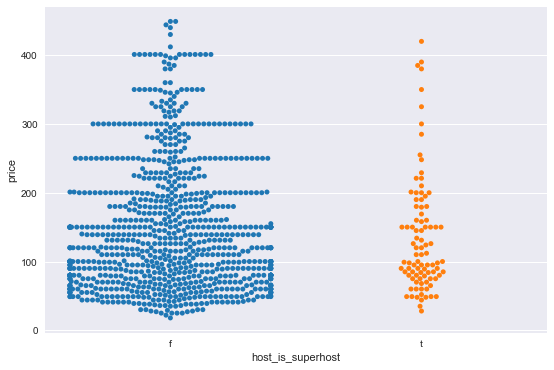

In [16]:
sns.swarmplot(x="host_is_superhost", y="price", data = data)

[Text(0,0,'Apartment'),
 Text(0,0,'House'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Other'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Condominium'),
 Text(0,0,'Bed & Breakfast'),
 Text(0,0,'Loft'),
 Text(0,0,'Timeshare'),
 Text(0,0,'Villa'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Vacation home'),
 Text(0,0,'Dorm'),
 Text(0,0,'In-law'),
 Text(0,0,'Boat'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Cabin'),
 Text(0,0,'Hostel')]

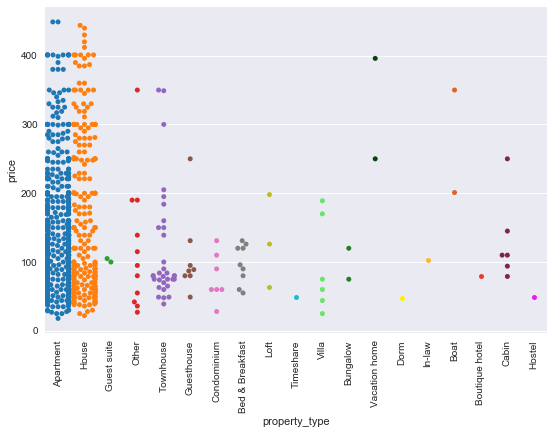

In [17]:
g=sns.swarmplot(x="property_type", y="price", data = data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

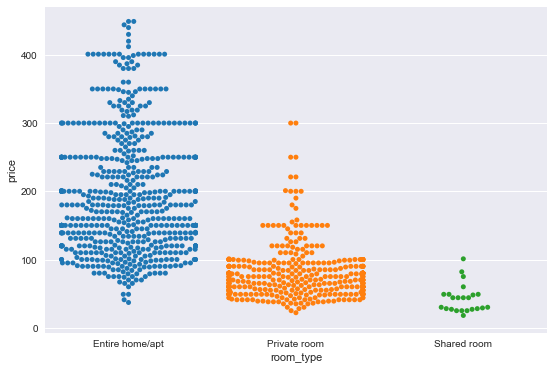

In [18]:
sns.swarmplot(x="room_type", y="price", data = data)

Boxplot was used to test the relationship between classes with price. As shown below, each of the class has different statistical properties such as mean and range. 

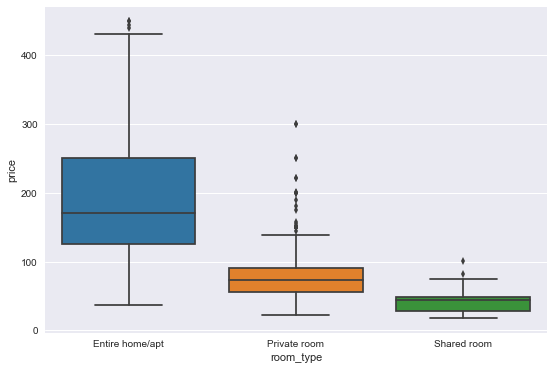

In [19]:
sns.boxplot(x="room_type", y="price", data = data);

Below charts were used to assess relationship between multiple predictors and price in order to capture hidden patterns. No significant patterns were found.

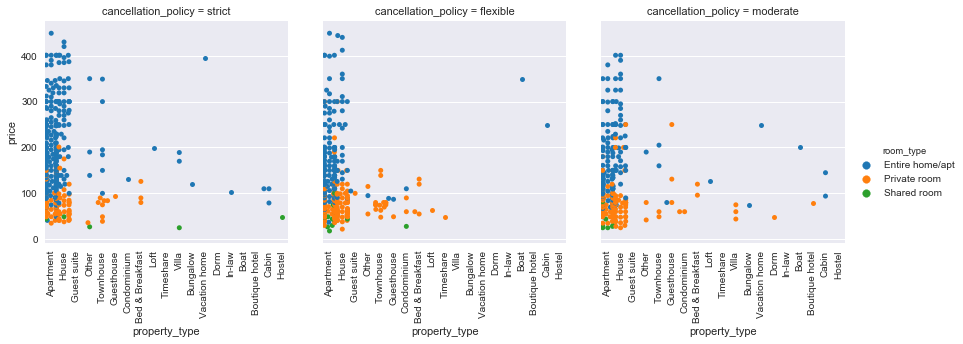

In [20]:
g=sns.factorplot(x="property_type", y="price", hue="room_type",
               col="cancellation_policy", data=data, kind="swarm");
g.set_xticklabels(rotation=90)

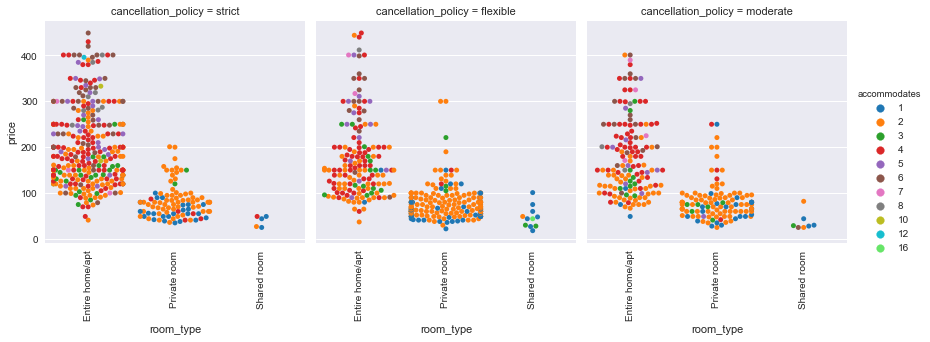

In [21]:
g=sns.factorplot(x="room_type", y="price", hue="accommodates",
               col="cancellation_policy", data=data, kind="swarm");
g.set_xticklabels(rotation=90)

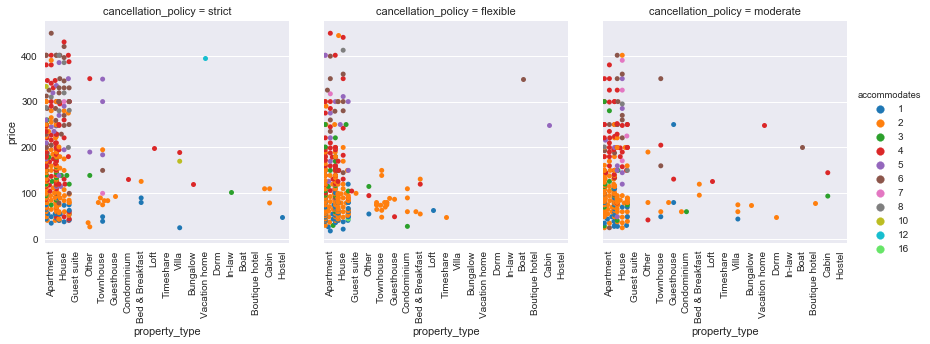

In [22]:
g=sns.factorplot(x="property_type", y="price", hue="accommodates",
               col="cancellation_policy", data=data, kind="swarm");
g.set_xticklabels(rotation=90)

As above, below chart shows some correlation between classess and price. Some classes have similar properties hence open up the possibility to group some of the classes with similar properties

[Text(0,0,'Apartment'),
 Text(0,0,'House'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Other'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Condominium'),
 Text(0,0,'Bed & Breakfast'),
 Text(0,0,'Loft'),
 Text(0,0,'Timeshare'),
 Text(0,0,'Villa'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Vacation home'),
 Text(0,0,'Dorm'),
 Text(0,0,'In-law'),
 Text(0,0,'Boat'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Cabin'),
 Text(0,0,'Hostel')]

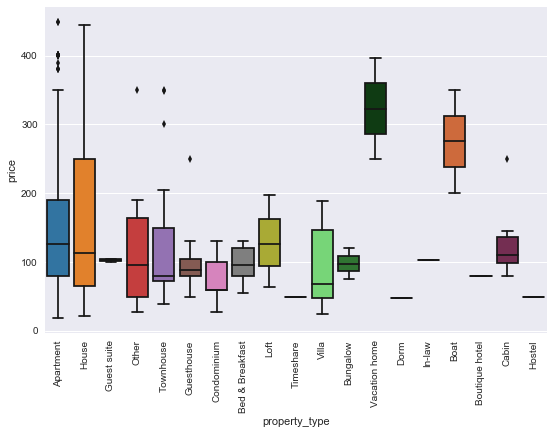

In [23]:
g=sns.boxplot(x="property_type", y="price", data = data);
g.set_xticklabels(g.get_xticklabels(),rotation=90)

# EDA: Spatial Data

This EDA provides the information of price on a map

Longitude and latitude can be combined into points on the map. The visualisation of the points indicates a relationship between these points and price. The closer the location to coastline, the higher the price. 

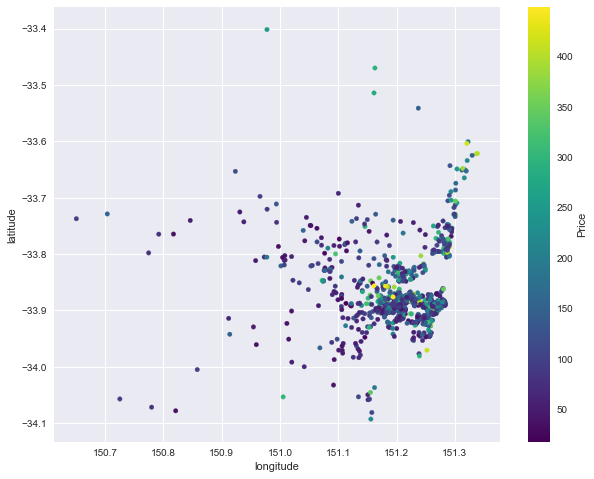

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['price'],cmap='viridis', s=20)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='Price')

# Join Train Data - Kaggle Test Data

Train Data and Kaggle Test Data are combined for further preparation

These data need to be combined because test data has significantly higher size and carry more classes in some categorical predictors than train dataset. 

In [25]:
train_objs_num = len(data)
dataset = pd.concat(objs=[data, data_kaggle], axis=0)

In [26]:
dataset

,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,extra_people,host_identity_verified,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit
Id,,,,,,,,,,,,,,,,,,,,,
0,2,1.0,1.0,1.0,strict,330.0,0,t,f,22.0,...,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.53,Entire home/apt,500.0
1,2,1.5,1.0,1.0,flexible,NaN,0,t,f,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NaN
2,4,2.0,2.0,2.0,moderate,180.0,0,t,t,1.0,...,10.0,10.0,10.0,10.0,10.0,99.0,9.0,2.38,Entire home/apt,500.0
3,6,1.5,3.0,4.0,flexible,80.0,0,f,f,1.0,...,10.0,10.0,10.0,10.0,10.0,100.0,10.0,1.96,Entire home/apt,0.0
4,4,1.0,2.0,2.0,moderate,85.0,50,t,f,6.0,...,10.0,10.0,10.0,10.0,10.0,97.0,10.0,2.73,Entire home/apt,350.0
5,6,1.0,3.0,4.0,flexible,70.0,0,f,f,1.0,...,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.28,Entire home/apt,NaN
6,4,1.0,2.0,2.0,moderate,50.0,0,t,f,1.0,...,9.0,10.0,9.0,10.0,10.0,90.0,9.0,0.16,Entire home/apt,NaN
7,2,1.0,1.0,1.0,moderate,35.0,30,t,f,1.0,...,10.0,10.0,10.0,10.0,10.0,80.0,8.0,0.45,Entire home/apt,NaN
8,6,1.0,2.0,3.0,strict,80.0,40,t,f,2.0,...,9.0,10.0,9.0,10.0,10.0,92.0,9.0,2.93,Entire home/apt,0.0


# Create Zones Using Kmeans

Kmeans is used to create 20 zones based on latitude and longitude information on the join data set

Near poinst could have similar properties hence grouping them could possibly add more information. 

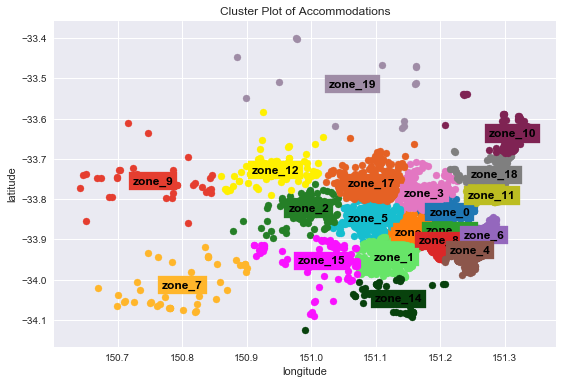

In [27]:
from sklearn.cluster import KMeans

np.random.seed(0)

X = np.array(list(zip(dataset['longitude'].values, dataset['latitude'].values)))

ktest = KMeans(n_clusters=20, random_state=0)
ktest.fit(X)
y = ktest.predict(X)

zone_new_list = ['zone_' + str(x)  for x in y.tolist()]

dataset['zone'] = zone_new_list

#loop through labels and plot each cluster
for i, label in enumerate(dataset.zone.unique()):

    #add data points 
    plt.scatter(x=dataset.loc[dataset['zone']==label, 'longitude'], 
                y=dataset.loc[dataset['zone']==label,'latitude'], 
                color=colours[i], 
                alpha=1)
    
    #add label
    plt.annotate(label, 
                 dataset.loc[dataset['zone']==label,['longitude','latitude']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 color='black',
                 backgroundcolor=colours[i] ) 
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Cluster Plot of Accommodations')
    plt.grid(True)

# Imput Missing Values

Both Train data and Kaggle Test Data contain some missing values. We impute those missing values on the join data set.

In [28]:
#to count missing values on each variable
dataset.isnull().sum()

accommodates                      0
bathrooms                        11
bedrooms                          5
beds                             13
cancellation_policy               0
cleaning_fee                   2844
extra_people                      0
host_identity_verified           14
host_is_superhost                14
host_total_listings_count        14
instant_bookable                  0
is_business_travel_ready          0
latitude                          0
longitude                         0
maximum_nights                    0
minimum_nights                    0
number_of_reviews                 0
price                          7967
property_type                     0
review_scores_accuracy         2826
review_scores_checkin          2838
review_scores_cleanliness      2822
review_scores_communication    2827
review_scores_location         2838
review_scores_rating           2806
review_scores_value            2841
reviews_per_month              2594
room_type                   

In [29]:
#Imputing missing value by using mean, mode or number 0

def impute_values(df):   
    df['host_is_superhost']=(df['host_is_superhost']).fillna(mode(df['host_is_superhost']))
    df['host_total_listings_count']=(df['host_total_listings_count']).fillna(mode(df['host_total_listings_count']))
    df['host_identity_verified']=(df['host_identity_verified']).fillna(mode(df['host_identity_verified']))
    df['bathrooms']=(df['bathrooms']).fillna(mode(df['bathrooms']))
    df['beds']=(df['beds']).fillna(mode(df['beds']))
    df['bedrooms']=(df['bedrooms']).fillna(mode(df['bedrooms']))
    df['security_deposit']=(df['security_deposit']).fillna(0)
    df['cleaning_fee']=(df['cleaning_fee']).fillna(0)
    df['review_scores_rating']=(df['review_scores_rating']).fillna(mean(df['review_scores_rating'].notnull()))
    df['review_scores_accuracy']=(df['review_scores_accuracy']).fillna(mean(df['review_scores_accuracy'].notnull()))
    df['review_scores_cleanliness']=(df['review_scores_cleanliness']).fillna(mean(df['review_scores_cleanliness'].notnull()))
    df['review_scores_checkin']=(df['review_scores_checkin']).fillna(mean(df['review_scores_checkin'].notnull()))
    df['review_scores_communication']=(df['review_scores_communication']).fillna(mean(df['review_scores_communication'].notnull()))
    df['review_scores_location']=(df['review_scores_location']).fillna(mean(df['review_scores_location'].notnull()))
    df['review_scores_value']=(df['review_scores_value']).fillna(mean(df['review_scores_value'].notnull()))
    df['reviews_per_month']=(df['reviews_per_month']).fillna(0)
    return df

df_consolidate_imputed = impute_values(dataset)

In [30]:
#check if all missing value has been imputed, except for 'price' on Kaggle Test Data

df_consolidate_imputed.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
cancellation_policy               0
cleaning_fee                      0
extra_people                      0
host_identity_verified            0
host_is_superhost                 0
host_total_listings_count         0
instant_bookable                  0
is_business_travel_ready          0
latitude                          0
longitude                         0
maximum_nights                    0
minimum_nights                    0
number_of_reviews                 0
price                          7967
property_type                     0
review_scores_accuracy            0
review_scores_checkin             0
review_scores_cleanliness         0
review_scores_communication       0
review_scores_location            0
review_scores_rating              0
review_scores_value               0
reviews_per_month                 0
room_type                   

# Group Sparse Classes: property_type

Some predictors contain sparse classes. Particularly, we group sparse classes in 'property_type' into six other classes based on their average price

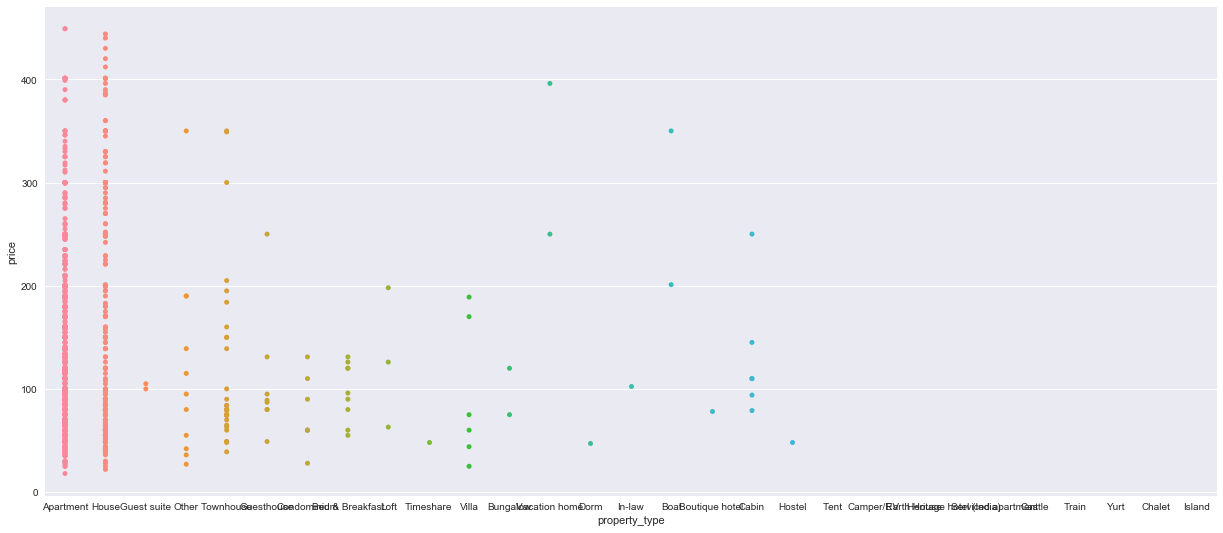

In [31]:
plt.rcParams['figure.figsize'] = (21, 9)
sns.set_style('darkgrid')
sns.stripplot(x="property_type", y="price", data=df_consolidate_imputed);

Summary statistics for further analysis in grouping the classes within the property_type

In [32]:
#to see count and mean price of each property_type

df_consolidate_imputed.groupby('property_type')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,651.0,144.66,82.58,18.0,80.00,126.0,189.50,449.0
Bed & Breakfast,9.0,97.56,28.56,55.0,80.00,96.0,120.00,131.0
Boat,2.0,275.50,105.36,201.0,238.25,275.5,312.75,350.0
Boutique hotel,1.0,79.00,NaN,79.0,79.00,79.0,79.00,79.0
Bungalow,2.0,97.50,31.82,75.0,86.25,97.5,108.75,120.0
Cabin,6.0,131.33,62.15,79.0,98.00,110.0,136.25,250.0
Camper/RV,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Castle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chalet,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Grouping sparse classes on property_type into six other classes based on their average price

df_consolidate_imputed['property_type'].replace(
    to_replace=['Dorm','Hostel','Timeshare','Heritage hotel (India)','Tent','Train','Yurt'],
    value='property1',
    inplace=True
)

df_consolidate_imputed['property_type'].replace(
    to_replace=['Condominium','Boutique hotel'],
    value='property2',
    inplace=True
)

df_consolidate_imputed['property_type'].replace(
    to_replace=['Villa','Bungalow','Bed & Breakfast','Camper/RV'],
    value='property3',
    inplace=True
)

df_consolidate_imputed['property_type'].replace(
    to_replace=['Guest suite','In-law','Guesthouse','Earth House'],
    value='property4',
    inplace=True
)

df_consolidate_imputed['property_type'].replace(
    to_replace=['Other','Loft','Cabin'],
    value='property5',
    inplace=True
)

df_consolidate_imputed['property_type'].replace(
    to_replace=['Boat','Vacation home','Castle','Chalet','Island','Serviced apartment'],
    value='property6',
    inplace=True
)

In [34]:
#Number of classes after grouping

df_consolidate_imputed['property_type'].unique()

array(['Apartment', 'House', 'property4', 'property5', 'Townhouse',
       'property2', 'property3', 'property1', 'property6'], dtype=object)

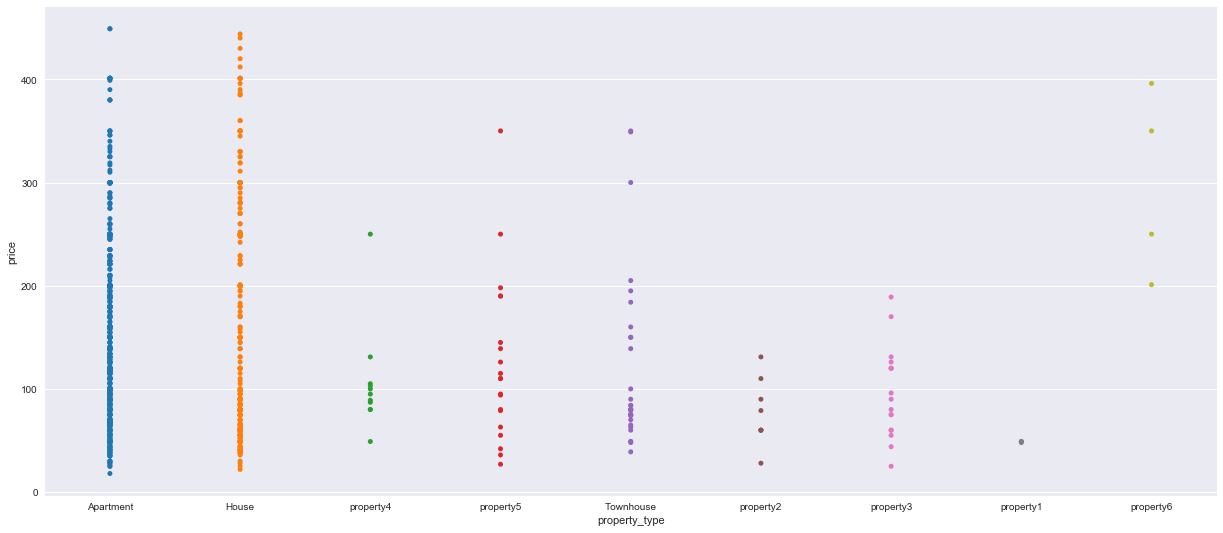

In [35]:
#plotting after grouping

plt.rcParams['figure.figsize'] = (21, 9)
sns.set_style('darkgrid')
sns.stripplot(x="property_type", y="price", data=df_consolidate_imputed);

# Create Dummy Variables

This is to create dummy variable on categorical predictors

In [36]:
df_consol_imp_dum = pd.get_dummies(df_consolidate_imputed, drop_first=True)

In [37]:
df_consol_imp_dum

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,extra_people,host_total_listings_count,latitude,longitude,maximum_nights,...,zone_zone_18,zone_zone_19,zone_zone_2,zone_zone_3,zone_zone_4,zone_zone_5,zone_zone_6,zone_zone_7,zone_zone_8,zone_zone_9
Id,,,,,,,,,,,,,,,,,,,,,
0,2,1.0,1.0,1.0,330.0,0,22.0,-33.846469,151.205171,1125,...,0,0,0,0,0,0,0,0,0,0
1,2,1.5,1.0,1.0,0.0,0,1.0,-33.895736,151.173529,30,...,0,0,0,0,0,0,0,0,0,0
2,4,2.0,2.0,2.0,180.0,0,1.0,-33.879322,151.222408,90,...,0,0,0,0,0,0,0,0,0,0
3,6,1.5,3.0,4.0,80.0,0,1.0,-33.856874,151.149600,1125,...,0,0,0,0,0,0,0,0,0,0
4,4,1.0,2.0,2.0,85.0,50,6.0,-33.907150,151.178552,30,...,0,0,0,0,0,0,0,0,1,0
5,6,1.0,3.0,4.0,70.0,0,1.0,-33.893954,151.244907,1125,...,0,0,0,0,0,0,1,0,0,0
6,4,1.0,2.0,2.0,50.0,0,1.0,-33.889091,151.277290,1125,...,0,0,0,0,0,0,1,0,0,0
7,2,1.0,1.0,1.0,35.0,30,1.0,-33.878998,151.233890,1125,...,0,0,0,0,0,0,0,0,0,0
8,6,1.0,2.0,3.0,80.0,40,2.0,-33.887270,151.273031,365,...,0,0,0,0,0,0,1,0,0,0


# Create Predictors Interactions

This feature engineering is to create additional predictors that we expect they can help explaining the response variable. However based on our trials, this feature engineeering has proven to not enhance the base model.

In [38]:
#We do not use this feature engineering since involving this feature does not result in the best prediction model.

#df_consol_imp_dum['bathrooms_bedrooms_ratio'] = np.where(df_consol_imp_dum['bedrooms']==0, 0, (df_consol_imp_dum['bathrooms']/df_consol_imp_dum['bedrooms']))
#df_consol_imp_dum['accommodates_bedrooms_ratio'] = np.where(df_consol_imp_dum['bedrooms']==0, 0, (df_consol_imp_dum['accommodates']/df_consol_imp_dum['bedrooms']))

In [39]:
#df_consol_imp_dum[['accommodates','bathrooms','bedrooms','bathrooms_bedrooms_ratio','accommodates_bedrooms_ratio',]]

# Create Predictors Transformation

This feature engineering is used to log transform the predictors that previously have a curve relationship with the rensponse variable into a linear relationship. However, based on our trials, this feature engineering was inconsistent to improve the base model.

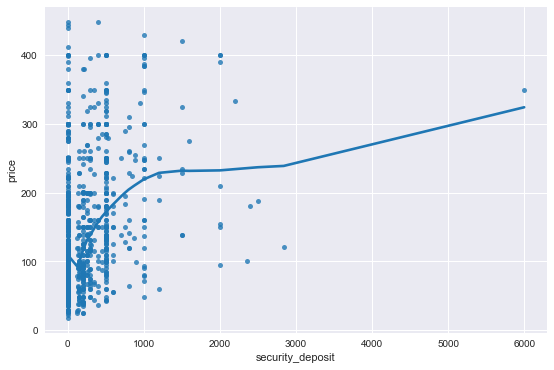

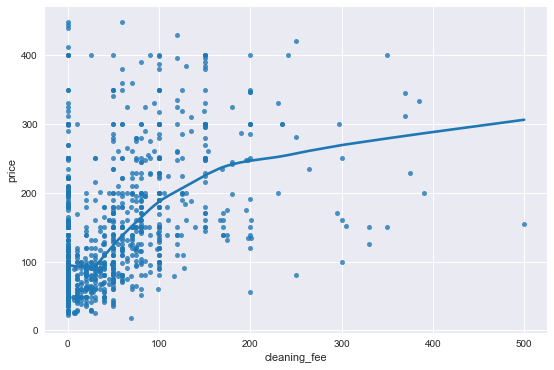

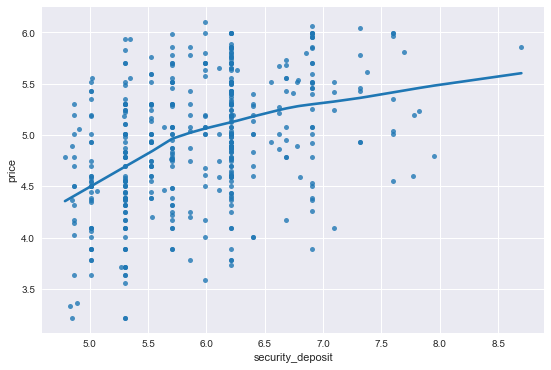

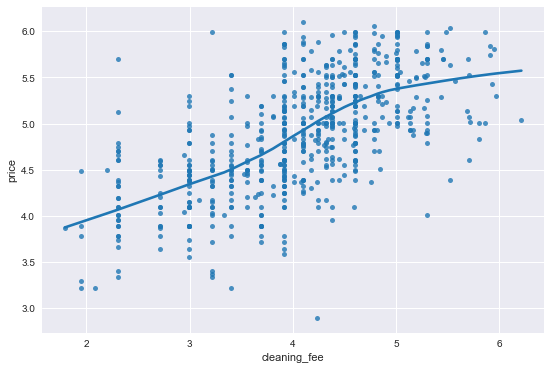

In [40]:
#We do not use this feature engineering since involving this feature does not result in the best prediction model.

#This is to see the relationships between predictors and respons variable before and after the transformation
plt.rcParams['figure.figsize'] = (9, 6)

sns.regplot((df_consol_imp_dum['security_deposit']), df_consol_imp_dum['price'], scatter_kws = {'s': 25}, lowess=True)
plt.show()
sns.regplot((df_consol_imp_dum['cleaning_fee']), df_consol_imp_dum['price'], scatter_kws = {'s': 25}, lowess=True)
plt.show()
sns.regplot(np.log(df_consol_imp_dum['security_deposit']), np.log(df_consol_imp_dum['price']), scatter_kws = {'s': 25}, lowess=True)
plt.show()
sns.regplot(np.log(df_consol_imp_dum['cleaning_fee']),np.log(df_consol_imp_dum['price']), scatter_kws = {'s': 25}, lowess=True)


In [41]:
df_consol_imp_dum[['security_deposit','cleaning_fee']]

,security_deposit,cleaning_fee
Id,,
0,500.0,330.0
1,0.0,0.0
2,500.0,180.0
3,0.0,80.0
4,350.0,85.0
5,0.0,70.0
6,0.0,50.0
7,0.0,35.0
8,0.0,80.0


In [42]:
#log transforming the predictors

#df_consol_imp_dum['log_deposit'] = np.where(df_consol_imp_dum['security_deposit']==0, 0, (np.log(df_consol_imp_dum['security_deposit'])))
#df_consol_imp_dum['log_cleaning'] = np.where(df_consol_imp_dum['cleaning_fee']==0, 0, (np.log(df_consol_imp_dum['cleaning_fee'])))

#df_consol_imp_dum.drop('security_deposit',axis=1,inplace=True)
#df_consol_imp_dum.drop('cleaning_fee',axis=1,inplace=True)

In [43]:
#df_consol_imp_dum[['log_deposit','log_cleaning']]

# Split Train Data - Kaggle Test Data

We return the join data set into train data set and Kaggle test data set

In [44]:
train_df = df_consol_imp_dum.iloc[:train_objs_num].copy()
test_kaggle = df_consol_imp_dum.iloc[train_objs_num:].copy()

In [45]:
#check whether train set is complete

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 57 columns):
accommodates                    1000 non-null int64
bathrooms                       1000 non-null float64
bedrooms                        1000 non-null float64
beds                            1000 non-null float64
cleaning_fee                    1000 non-null float64
extra_people                    1000 non-null int64
host_total_listings_count       1000 non-null float64
latitude                        1000 non-null float64
longitude                       1000 non-null float64
maximum_nights                  1000 non-null int64
minimum_nights                  1000 non-null int64
number_of_reviews               1000 non-null int64
price                           1000 non-null float64
review_scores_accuracy          1000 non-null float64
review_scores_checkin           1000 non-null float64
review_scores_cleanliness       1000 non-null float64
review_scores_communication     1000 non

In [46]:
#check whether kaggle test set is complete

test_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7967 entries, 0 to 7966
Data columns (total 57 columns):
accommodates                    7967 non-null int64
bathrooms                       7967 non-null float64
bedrooms                        7967 non-null float64
beds                            7967 non-null float64
cleaning_fee                    7967 non-null float64
extra_people                    7967 non-null int64
host_total_listings_count       7967 non-null float64
latitude                        7967 non-null float64
longitude                       7967 non-null float64
maximum_nights                  7967 non-null int64
minimum_nights                  7967 non-null int64
number_of_reviews               7967 non-null int64
price                           0 non-null float64
review_scores_accuracy          7967 non-null float64
review_scores_checkin           7967 non-null float64
review_scores_cleanliness       7967 non-null float64
review_scores_communication     7967 non-n

# Remove Outliers on Train Data using 99 Quantile

This feature engineering removes 1% of outliers. However, from our trials, this feature engineering worsens the base model.

In [47]:
#We do not use this feature engineering since involving this feature does not result in the best prediction model.

train_df[['extra_people','maximum_nights','minimum_nights','security_deposit']].describe()

,extra_people,maximum_nights,minimum_nights,security_deposit
count,1000.00000,1000.000000,1000.000000,1000.00000
mean,10.85600,693.481000,3.807000,226.95600
std,21.09688,534.775022,6.098274,403.55701
min,0.00000,1.000000,1.000000,0.00000
25%,0.00000,30.000000,1.000000,0.00000
50%,0.00000,1125.000000,2.000000,0.00000
75%,20.00000,1125.000000,4.000000,350.00000
max,250.00000,3000.000000,90.000000,6000.00000


In [48]:
#to remove outliers using 99 percentile

#train_df_out=train_df[train_df['extra_people']<train_df['extra_people'].quantile(.99)]
#train_df_out=train_df_out[train_df_out['security_deposit']<train_df_out['security_deposit'].quantile(.99)]
#Removing outliers in security_deposit overlaps with log transforming security_deposit. In this case, log transformation prevails.

In [49]:
#train_df_out[['extra_people','maximum_nights','minimum_nights','security_deposit']].describe()

# Split Train Data - Test Data

We split train data into 70%-30% train set - test set for model evaluation

In [50]:
#Split data intro training and test datasets
from sklearn.model_selection import train_test_split

#change train_df to train_df_out to apply removing outliers feature
X_train, X_test = train_test_split(train_df, test_size=0.3,train_size=0.7, random_state=0)

Y_train = X_train['price']
Y_test = X_test['price']
X_train.drop('price',axis=1,inplace=True)
X_test.drop('price',axis=1,inplace=True)
test_kaggle.drop('price',axis=1,inplace=True)

In [51]:
#check the train set

X_train

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,extra_people,host_total_listings_count,latitude,longitude,maximum_nights,...,zone_zone_18,zone_zone_19,zone_zone_2,zone_zone_3,zone_zone_4,zone_zone_5,zone_zone_6,zone_zone_7,zone_zone_8,zone_zone_9
Id,,,,,,,,,,,,,,,,,,,,,
105,2,1.0,1.0,1.0,25.0,20,1.0,-33.801767,151.290440,1125,...,0,0,0,0,0,0,0,0,0,0
68,6,1.5,2.0,2.0,69.0,20,4.0,-33.764623,150.792305,1125,...,0,0,0,0,0,0,0,0,0,1
479,4,2.0,2.0,2.0,0.0,0,1.0,-33.902614,151.209878,28,...,0,0,0,0,0,0,0,0,1,0
399,2,1.0,1.0,1.0,60.0,0,1.0,-33.888753,151.276231,14,...,0,0,0,0,0,0,1,0,0,0
434,2,1.0,1.0,1.0,99.0,0,1.0,-33.842538,151.227998,30,...,0,0,0,0,0,0,0,0,0,0
258,2,2.0,3.0,1.0,0.0,0,2.0,-33.894805,151.246894,1125,...,0,0,0,0,0,0,1,0,0,0
827,2,1.0,0.0,1.0,40.0,0,1.0,-33.889601,151.272684,25,...,0,0,0,0,0,0,1,0,0,0
884,2,1.0,1.0,1.0,35.0,0,2.0,-33.873168,151.223231,1125,...,0,0,0,0,0,0,0,0,0,0
304,6,1.5,3.0,3.0,50.0,150,2.0,-33.898930,151.173894,1125,...,0,0,0,0,0,0,0,0,0,0


# Update Predictors List

In [52]:
predictors=list(X_train) #updating predictors list

In [53]:
#to list predictors
predictors

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'extra_people',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'security_deposit',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'host_identity_verified_t',
 'host_is_superhost_t',
 'instant_bookable_t',
 'is_business_travel_ready_t',
 'property_type_House',
 'property_type_Townhouse',
 'property_type_property1',
 'property_type_property2',
 'property_type_property3',
 'property_type_property4',
 'property_type_property5',
 'property_type_property6',
 'room_type_Private room',
 'room_type_Shared room',
 'zone_zone_1',
 'zone_zone_10',
 'zone_zone_11',
 'zone_zone_12',
 'zone_zone_13',
 'zone_zone_14',
 'zone_zone_15',


In [54]:
#to count number of predictors

len(predictors)

56

# Log Transform Y Variable

This feature engineering uses log transformation to normalise the response variable. However, based on our trials, this feature engineering does not improve the base model's prediction accuracy.

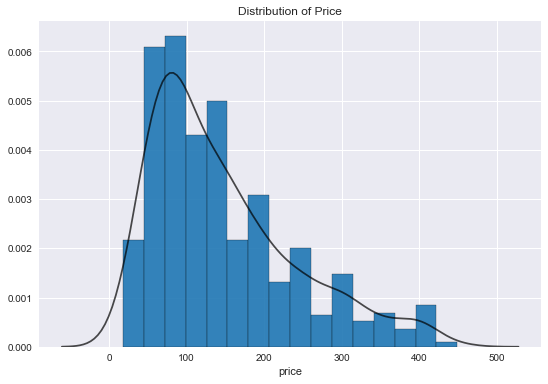

In [55]:
#We do not use this feature engineering since involving this feature does not result in the best prediction model.

from statlearning import plot_histogram

plot_histogram(Y_train)
plt.title('Distribution of Price')
plt.show()

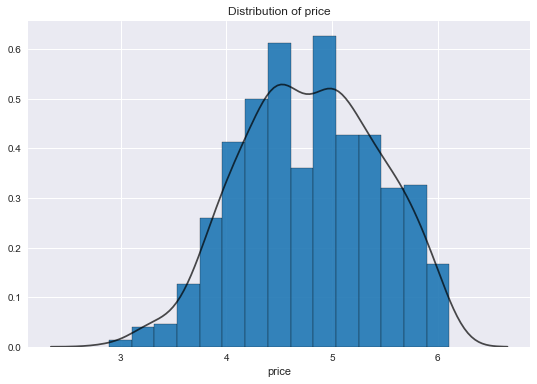

In [56]:
#transforming price into log price
#plotting log price distribution

Y_train_log = np.log(Y_train)
Y_test_log = np.log(Y_test)

plot_histogram(Y_train_log)
plt.title('Distribution of price')
plt.show()

# Model Development

We import libraries to develop our models. We run 15 different models in our pleriminary selction but we only come up 6 models for our final models: lasso, ridge, LightGBM, XGBoost, additive boosting, and model stacking.

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from statlearning import forward
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from statlearning import plot_coefficients
from statlearning import plot_feature_importance

# Linear Regression

Linear Regression was used in our preliminary model selection but we dropped it in further model selection.

In [58]:
np.random.seed(0)

ols = LinearRegression()
ols.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# KNN

KNN was used in our preliminary model selection but we dropped it in further model selection.

In [59]:
np.random.seed(0)

model = KNeighborsRegressor() 
    
tuning_parameters = {
    'n_neighbors': np.arange(1,101),
}

knn_search =  GridSearchCV(model, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=4)
knn_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_neighbors': array([  1,   2, ...,  99, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
#to find out the best number of neighbour

knn_search.best_params_

{'n_neighbors': 13}

In [61]:
knn_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='uniform')

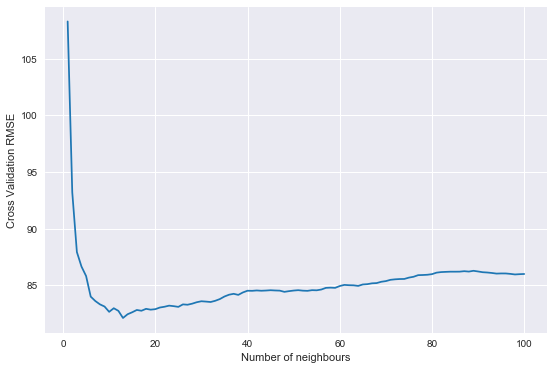

Lowest CV error: K = 13


In [62]:
from sklearn.model_selection import cross_val_score

np.random.seed(0)

neighbours=np.arange(1, 101)

cv_rmse = []
for k in neighbours: 
    model = KNeighborsRegressor(n_neighbors= k) 
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-1*np.mean(scores))
    cv_rmse.append(rmse)

fig, ax= plt.subplots()
ax.plot(neighbours, cv_rmse)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Cross Validation RMSE')
sns.despine()
plt.show()
  
print(f'Lowest CV error: K = {1 + np.argmin(cv_rmse)}')  

In [63]:
np.random.seed(0)

knn = knn_search.best_estimator_
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='uniform')

# Subset Selection

Subset Selection was used in our preliminary model selection but we dropped it in further model selection.

In [64]:
%%time

np.random.seed(0)

fwd = forward()
fwd.fit(X_train, Y_train)

Wall time: 4.41 s


In [65]:
#to show which predictors are selected under forward selection algorithm

fwd.subset

[0, 35, 36, 2, 8, 20, 46, 1, 50, 54, 22, 10, 45, 27, 34]

In [66]:
#to count the number of predictors selected

len(fwd.subset)

15

In [67]:
#to list predictors selected

list(X_train.iloc[:,fwd.subset])

['accommodates',
 'room_type_Private room',
 'room_type_Shared room',
 'bedrooms',
 'longitude',
 'security_deposit',
 'zone_zone_18',
 'bathrooms',
 'zone_zone_4',
 'zone_zone_8',
 'cancellation_policy_strict',
 'minimum_nights',
 'zone_zone_17',
 'property_type_House',
 'property_type_property6']

# Lasso

We use lasso as the component of our model stacking

In [68]:
np.random.seed(0)
lasso = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5)),
))

lasso.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [69]:
#to show the number of coeffs shrunk by lasso

reg = lasso._final_estimator # the final estimator attribute refers to the pipeline
np.sum(reg.coef_==0.0)

25

In [70]:
#to identify the value of lambda (penalty) to shrink the predictors used by lasso

lasso.named_steps['estimator'].alpha_

1.3432117650793192

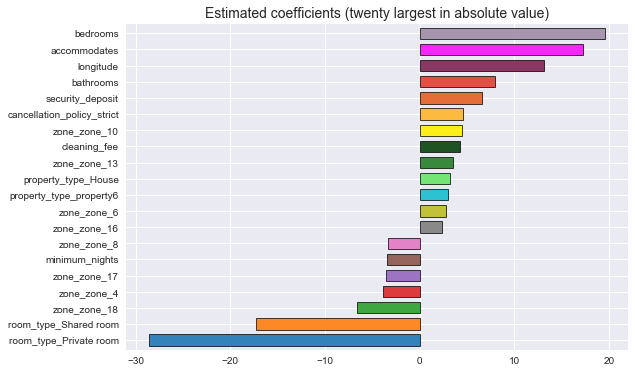

In [71]:
#plotting important variables under lasso model

plot_coefficients(reg, predictors)
plt.show()

# Ridge Regression

We use ridge as the component of our model stacking

In [72]:
np.random.seed(0)
alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))

ridge.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', RidgeCV(alphas=[3.0517578125e-05, 3.505549179068098e-05, 4.026818575356734e-05, 4.625599873383782e-05, 5.313418965430448e-05, 6.103515625e-05, 7.011098358136196e-05, 8.053637150713468e-05, 9.251199746767564e-0...cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [73]:
#to identify the value of lambda (penalty) to shrink the predictors used by ridge

ridge.named_steps['estimator'].alpha_

64.0

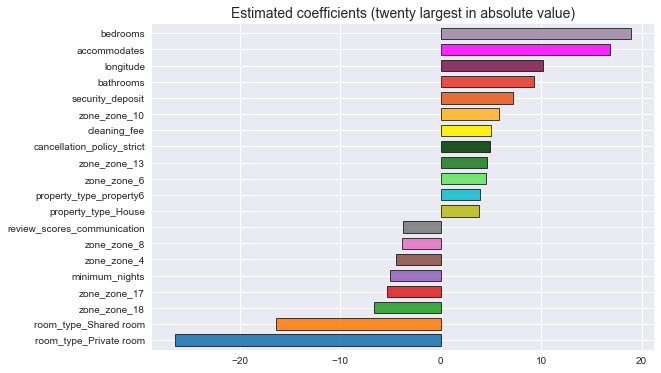

In [74]:
#to plot important predictors under ridge

plot_coefficients(ridge._final_estimator, predictors )
plt.show()

# Elastic Net

Elastic Net was used in preliminary model selection but we dropped it in further model selection.

In [75]:
np.random.seed(0)
enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)),
))

enet.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

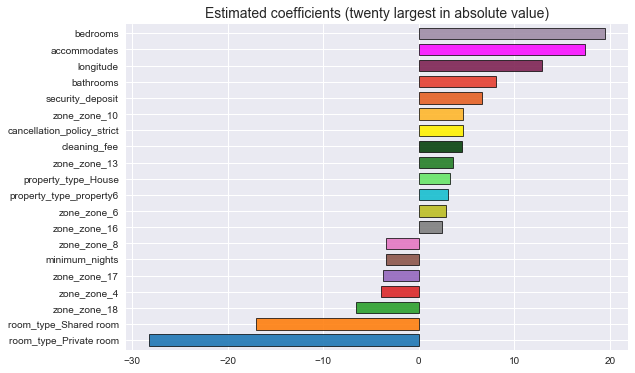

In [76]:
plot_coefficients(enet._final_estimator, predictors)
plt.show()

# Generalised Additive Model

General Additive Model was used in preliminary model selection but we dropped it in further model selection.

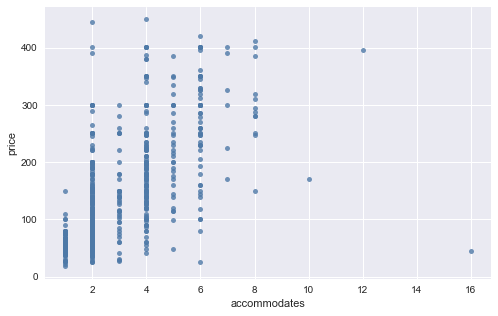

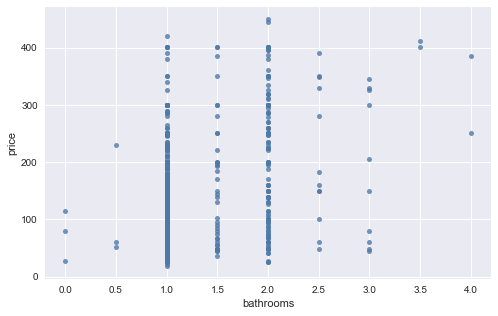

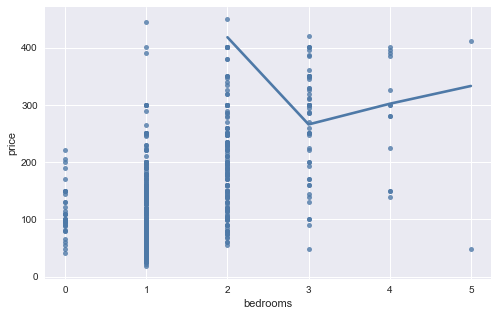

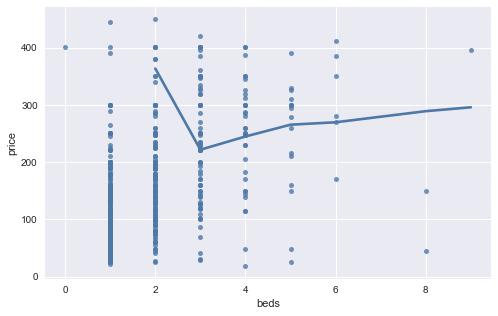

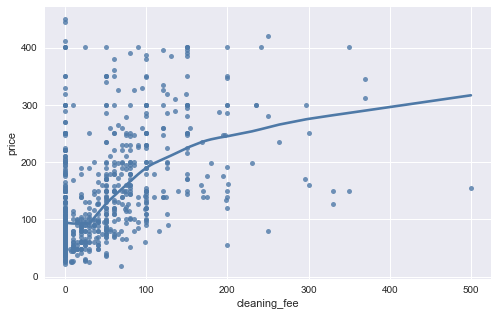

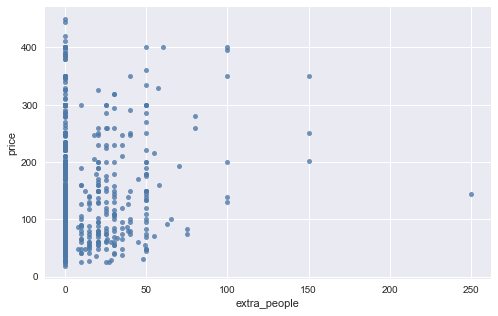

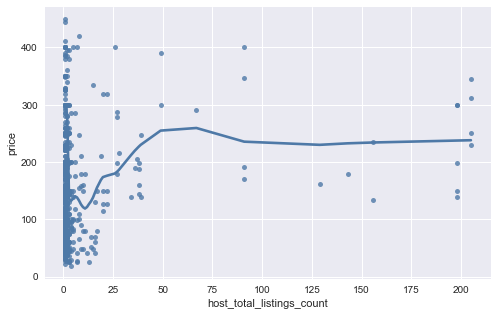

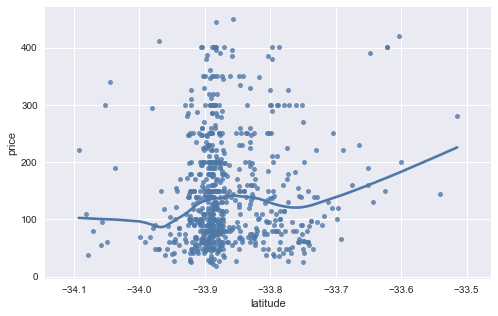

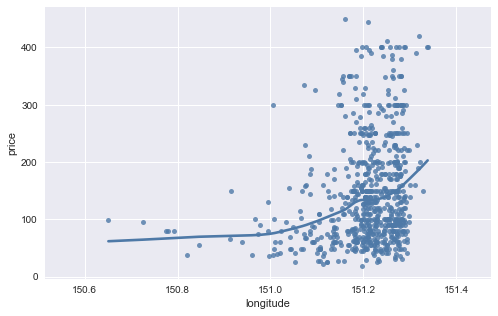

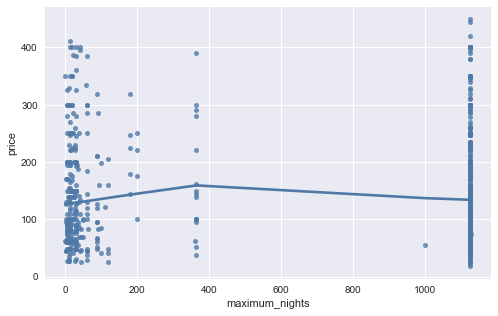

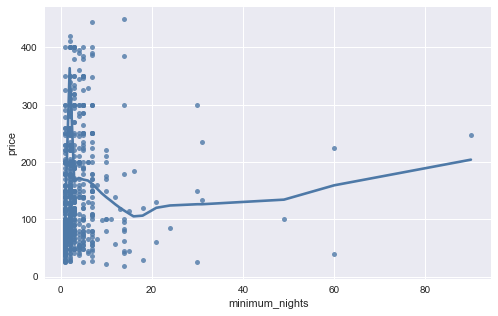

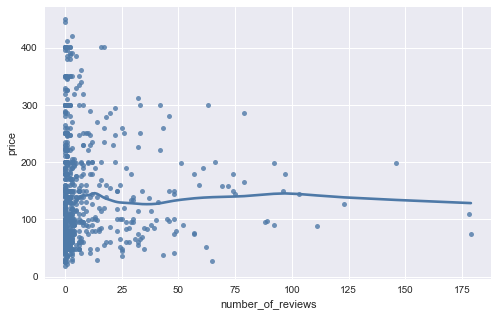

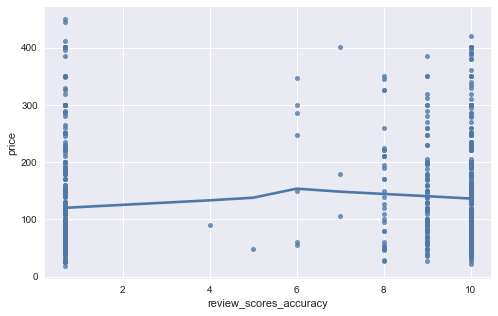

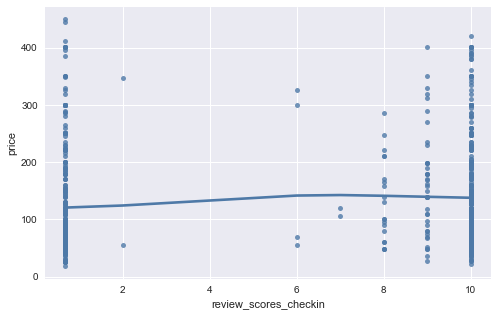

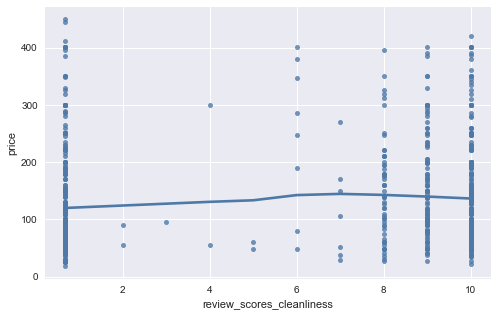

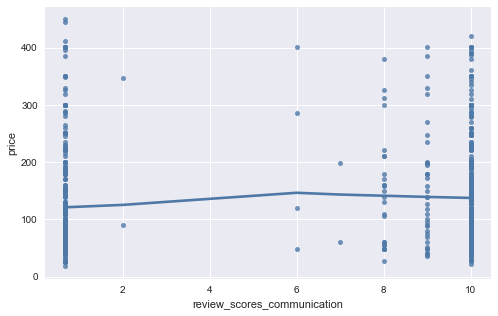

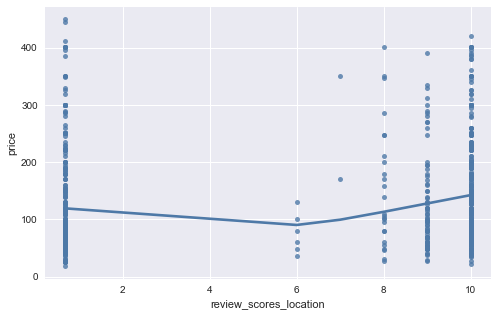

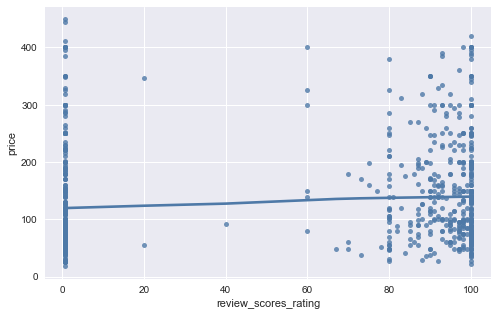

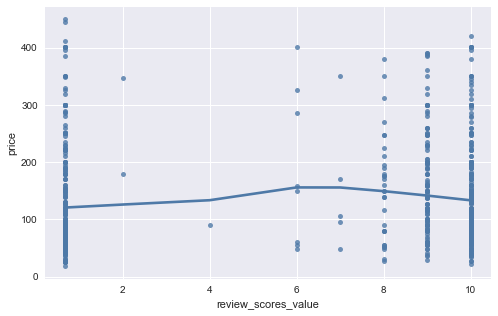

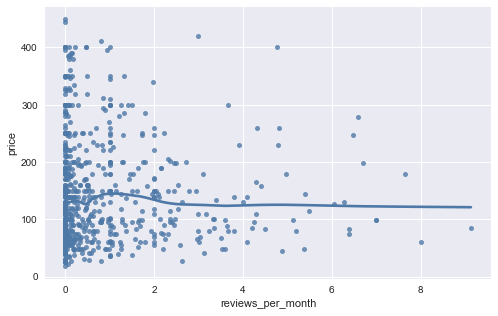

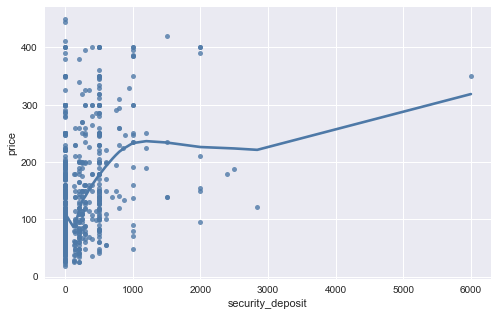

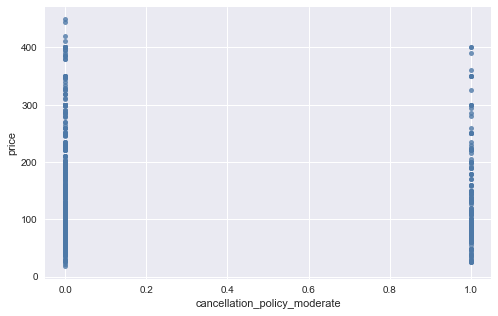

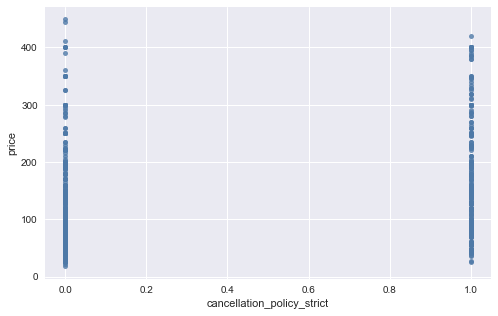

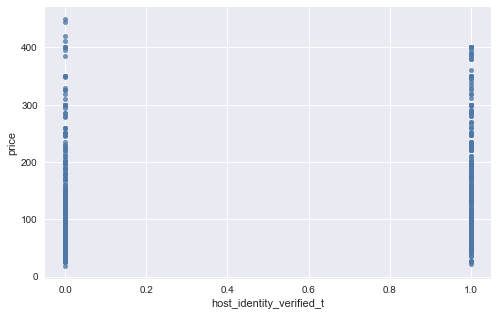

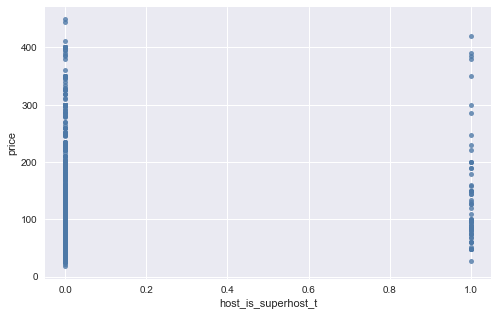

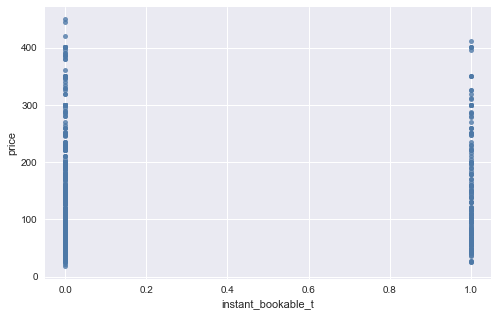

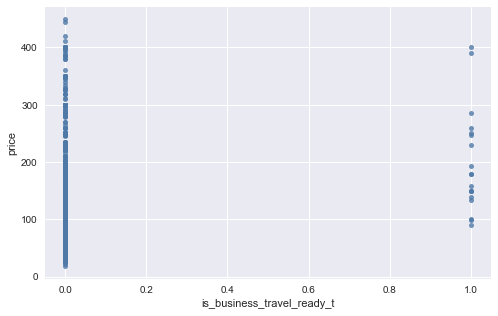

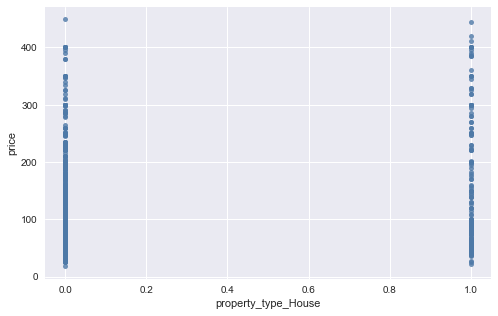

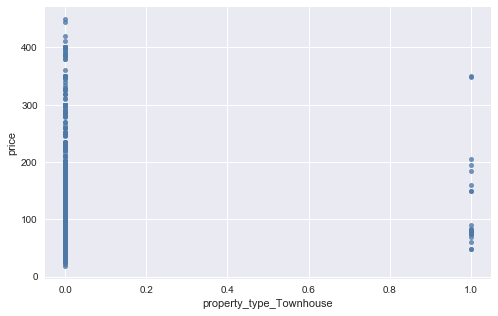

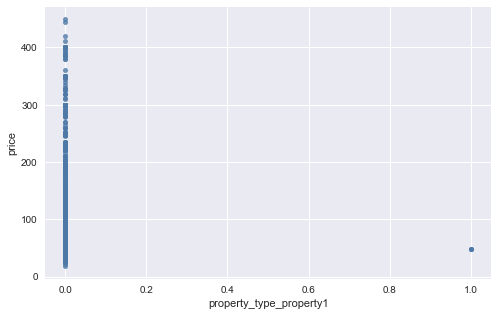

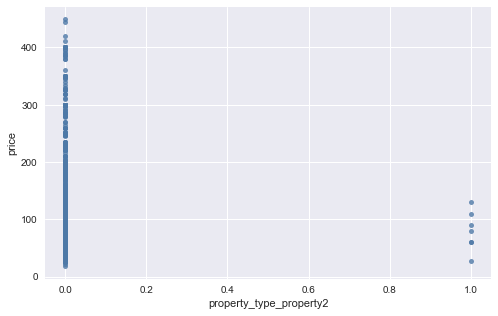

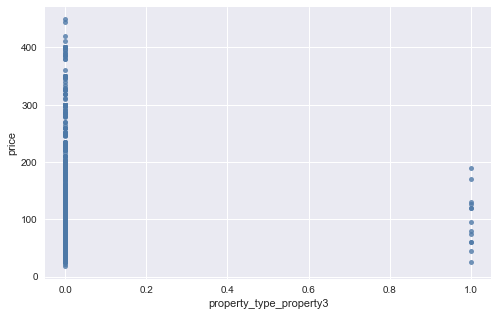

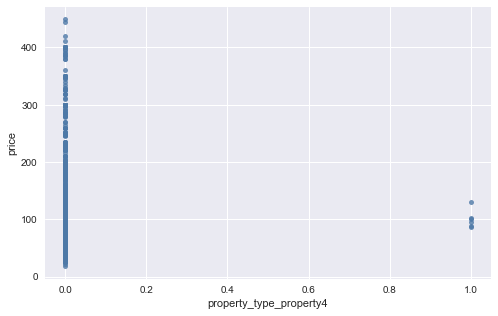

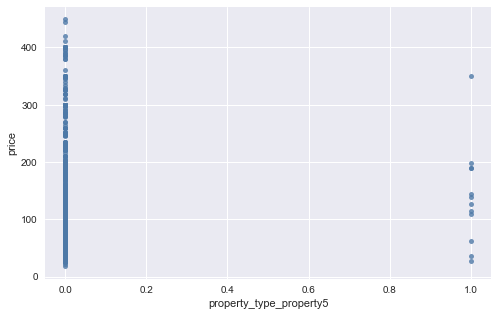

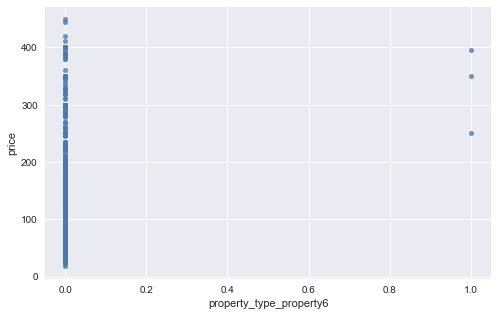

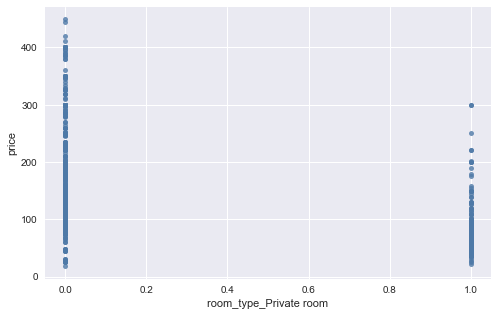

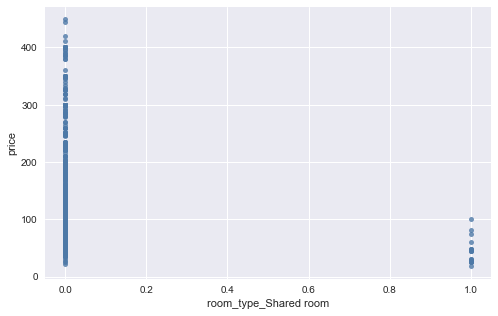

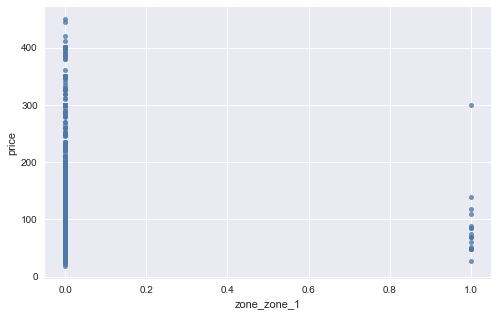

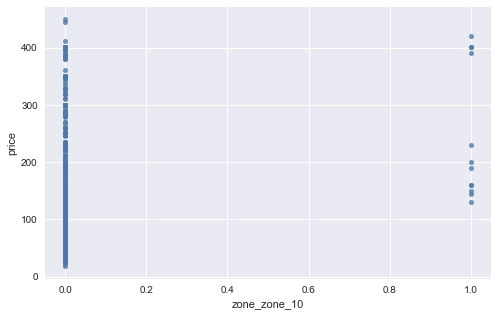

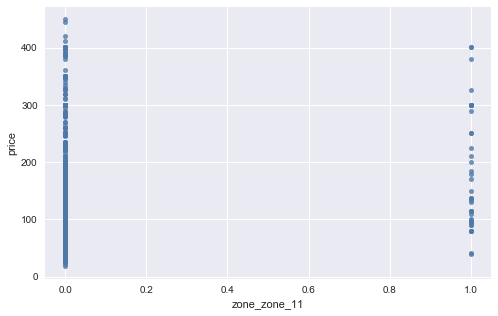

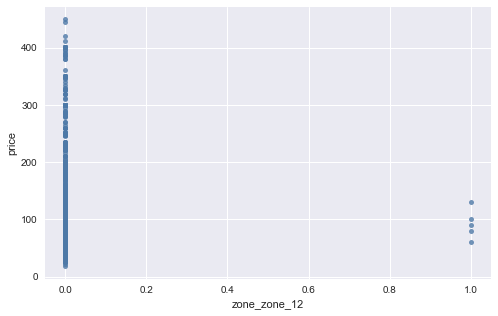

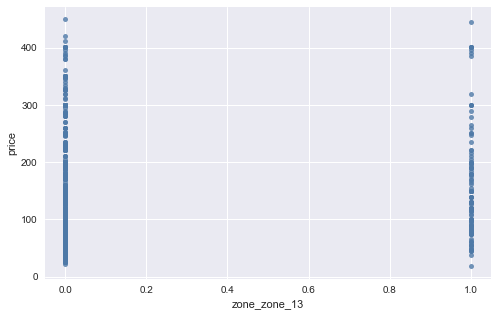

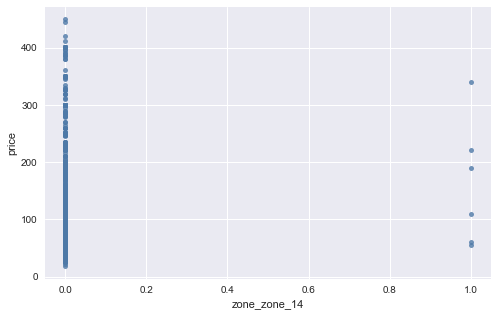

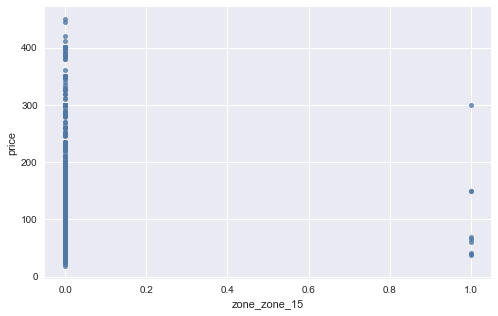

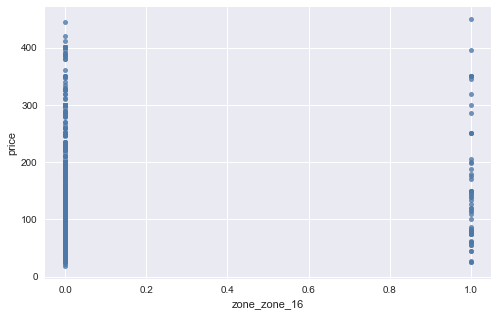

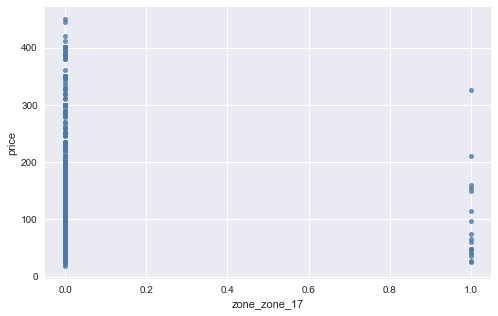

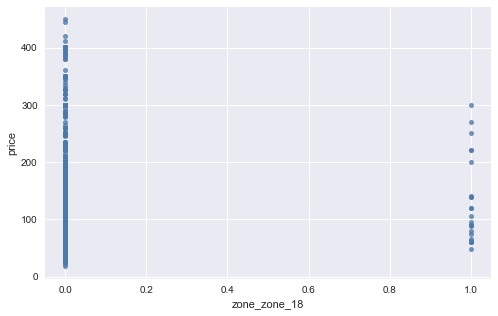

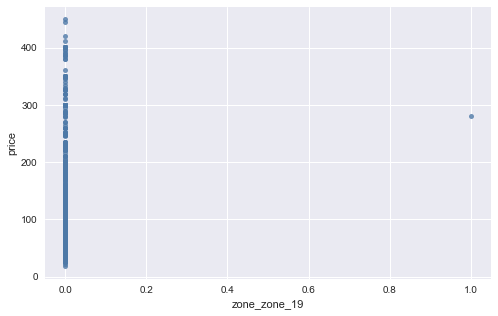

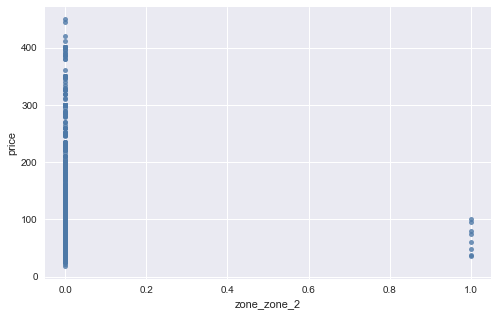

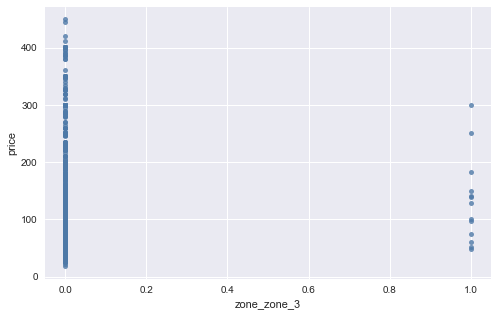

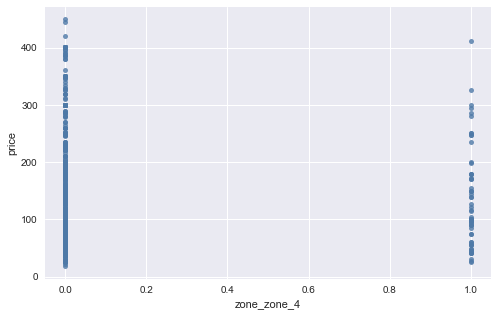

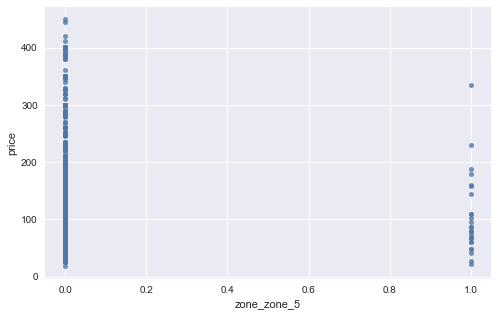

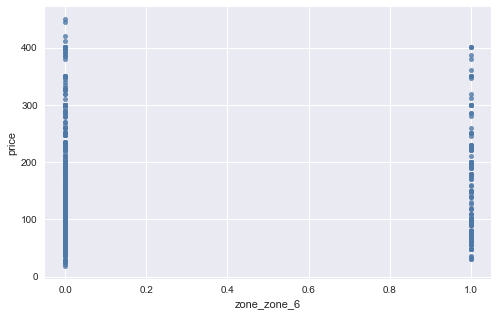

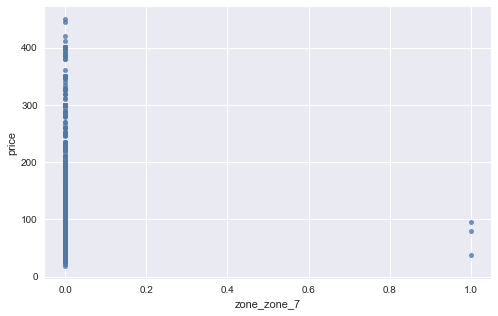

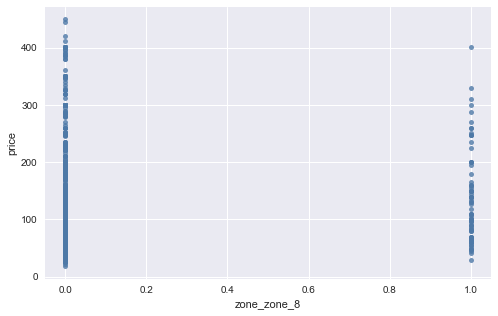

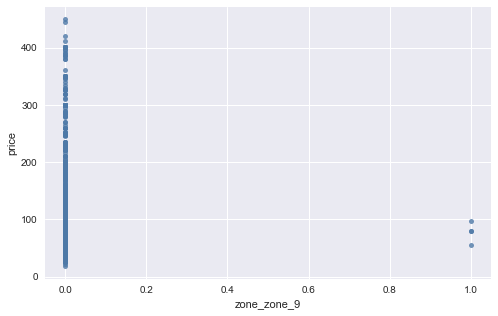

In [77]:
#we plot to identify the linearity relationships between predictors with respons variable

for x in predictors:
    with sns.color_palette(crayon):
        fig, ax = plt.subplots(figsize=(8,5))
        if (np.issubdtype(X_train[x], np.number) and x != 'price') :
            sns.regplot(X_train[x], Y_train, scatter_kws = {'s': 25}, lowess=True)
            sns.despine()
            fig.show()

In [78]:
#to set the number of degree of freedom for each non-linear predictor.

np.random.seed(0)

from statlearning import GAM_splines

# The choices here are intuitive based on the EDA plots, ideally we should use cross validation

nonlinear=['bedrooms','beds','cleaning_fee','host_total_listings_count','latitude','longitude','maximum_nights','minimum_nights','number_of_reviews','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value','reviews_per_month','security_deposit']  # predictors not included here are assumed to be linear
dfs=[5,7,8,13,7,6,5,9,8,6,5,6,5,5,4,7,8,8] # the minimum DF is three for this to work

X_train_gam, X_test_gam = GAM_splines(X_train, X_test, nonlinear, dfs)

In [79]:
np.random.seed(0)

gam = LinearRegression()
gam.fit(X_train_gam, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Regression Tree

Regression Tree was used in preliminary model selection but we dropped it in further model selection.

In [80]:
%%time

np.random.seed(0)

model = DecisionTreeRegressor(min_samples_leaf=5)

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
}

tree = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=5, return_train_score=False)
tree.fit(X_train, Y_train)

print('Best parameters:', tree.best_params_)

Best parameters: {'min_samples_leaf': 10, 'max_depth': 3}
Wall time: 775 ms


# Bagging

Bagging was used in preliminary model selection but we dropped it in further model selection.

In [81]:
np.random.seed(0)

bag = BaggingRegressor(n_estimators=1000, random_state=1)
bag.fit(X_train, Y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=1000, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

# Random Forest Regression

Random Forest Regression was used in preliminary model selection but we dropped it in further model selection.

In [82]:
%%time

np.random.seed(0)

model = RandomForestRegressor(n_estimators=100)

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, X_train.shape[1], 5),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 16, return_train_score=False, n_jobs=4,
                              random_state = 20)
rf_search.fit(X_train, Y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 5, 'max_features': 41} 

Wall time: 10.9 s


In [83]:
np.random.seed(0)

rf.n_estimators = 500
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=41, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

# Boosting

Boosting was used in preliminary model selection but we dropped it in further model selection.

In [84]:
%%time

np.random.seed(0)

model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
gb = RandomizedSearchCV(model, tuning_parameters, n_iter = 20, cv = 10, return_train_score=False, n_jobs=4)
gb.fit(X_train, Y_train)

print('Best parameters found by randomised search:', gb.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 750, 'max_depth': 2, 'learning_rate': 0.01} 

Wall time: 1min 48s


In [85]:
gb.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

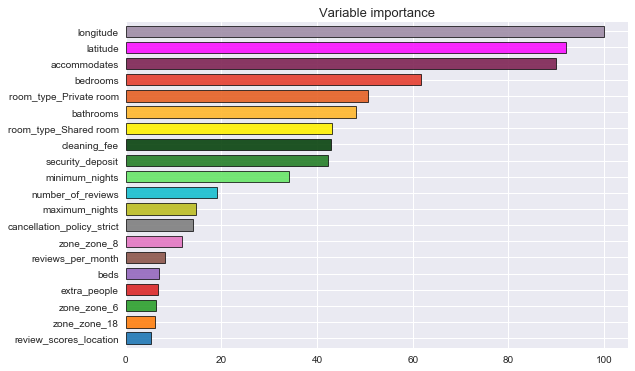

In [86]:
#to plot important variables under boosting

plot_feature_importance(gb.best_estimator_, predictors)
plt.show()

# LightGBM

We use LightGBM as the component of our model stacking

In [87]:
%%time

np.random.seed(0)

model = lgb.LGBMRegressor(objective='regression')


tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000, 3000, 5000],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 64, cv = 5, return_train_score=False, n_jobs=4, 
                               random_state = 20)

gb_search.fit(X_train, Y_train)

lbst = gb_search.best_estimator_


print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01} 

Wall time: 2min 44s


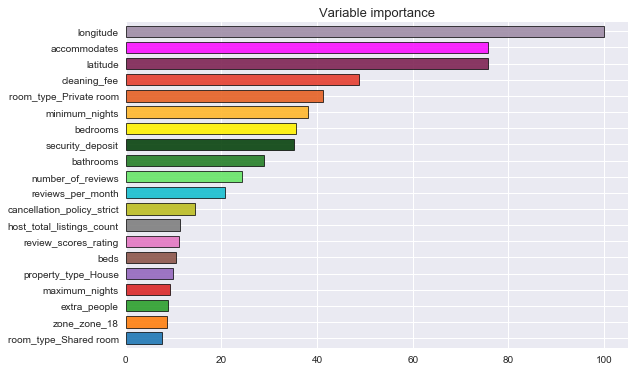

In [88]:
#to plot importance variables under LightGBM algorithm

plot_feature_importance(gb_search.best_estimator_, labels=predictors)
plt.show()

# XGBoost

We use XGBoost as the component of our model stacking

In [89]:
%%time

np.random.seed(0)

model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000, 3000, 5000],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 16, cv = 5, return_train_score=False, n_jobs=4,
                              random_state = 20)
gb_search.fit(X_train, Y_train)

xbst = gb_search.best_estimator_


print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01} 

Wall time: 1min 12s


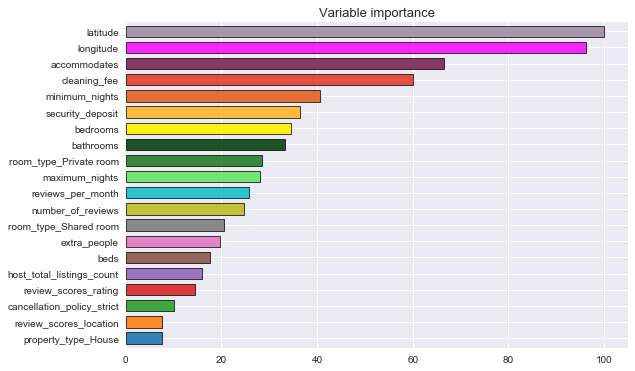

In [90]:
#to plot important variables under XGBoost algorithm

plot_feature_importance(gb_search.best_estimator_, labels=predictors)
plt.show()

# Additive Boosting

We use Additive Boosting as the component of our model stacking. This algorithm fits the linear regression model using the lasso with additive trees.

In [91]:
%%time

np.random.seed(0)

y_fit = lasso.predict(X_train)
resid = Y_train - y_fit

model = lgb.LGBMRegressor(objective='regression')


tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 16, cv = 5, return_train_score=False, n_jobs=4, 
                               random_state = 20)

gb_search.fit(X_train, resid)

abst = gb_search.best_estimator_


print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 1500, 'max_depth': 2, 'learning_rate': 0.01} 

Wall time: 57.5 s


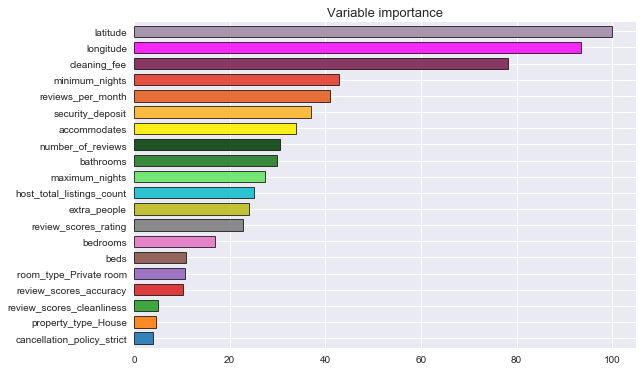

In [92]:
#to plot important variables under Additive Boosting algortihm

plot_feature_importance(gb_search.best_estimator_, labels=predictors)
plt.show()

# Model Stacking

This is model we choose for predicting Airbnb price in Sydney

In [93]:
%%time
np.random.seed(0)
from mlxtend.regressor import StackingCVRegressor

models = [lasso, ridge, lbst, xbst, abst]

stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=10)
f_stack = stack.fit(X_train.values, Y_train.ravel())

Wall time: 37 s


In [94]:
#this is to show intercept of the model stacking

stack.meta_regr_.intercept_

-3.27077337416398

In [95]:
#this is to show lasso, ridge, LighGBM, XGBoost, and Additive Boosting coefficients respectiveley inside the model stacking

stack.meta_regr_.coef_

array([ 0.63876187, -0.24084331,  0.07232023,  0.48338749,  0.06445054])

# Model Evaluation

We evaluate all models RMSE, R2 and MAE by using test set from 30% train data split.

In [96]:
columns=['Test RMSE', 'Test R2', 'Test MAE']
rows=['OLS', 'KNN', 'Subset Selection', 'Lasso', 'Ridge', 'Elastic Net', 'Tree', 'Bagged Trees', 'Random Forest', 'Boosting', 'LightGBM', 'XGBoost', 'Additive Boost', 'Stack']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[ols, knn, fwd, lasso, ridge, enet, tree, bag, rf, gb, lbst, xbst, abst, stack]

for i, method in enumerate(methods):
    
    if method != stack:
        
        y_pred= method.predict(X_test)   
        if method == abst:
            y_pred=ols.predict(X_test)+method.predict(X_test)
            
    else:
        y_pred= method.predict(X_test.values)
        
    results.iloc[i,0] = np.sqrt(mean_squared_error(Y_test, y_pred))
    results.iloc[i,1] = r2_score(Y_test, y_pred)
    results.iloc[i,2] = mean_absolute_error(Y_test, y_pred)

results.round(3)

,Test RMSE,Test R2,Test MAE
OLS,59.214,0.541,43.879
KNN,77.202,0.220,59.388
Subset Selection,60.217,0.525,44.901
Lasso,58.970,0.545,43.172
Ridge,59.339,0.539,43.685
Elastic Net,58.971,0.545,43.167
Tree,62.207,0.493,44.639
Bagged Trees,56.412,0.583,41.367
Random Forest,56.573,0.581,41.247
Boosting,56.630,0.580,41.376


In [97]:
#this is only for GAM model evaluation since it cannot be combined with the table above

columns=['Test RMSE', 'Test R2']
rows=['GAM']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[gam]

for i, method in enumerate(methods):
    
    y_pred=method.predict(X_test_gam)
    results.iloc[i,0] = np.sqrt(mean_squared_error(Y_test, y_pred))
    results.iloc[i,1] = r2_score(Y_test, y_pred)
    

results.round(3)

,Test RMSE,Test R2
GAM,68.198,0.391


# Create CSV Files

In [98]:
#before creating csv files, we set the train set into 100% train data (no split)

y_pred_ols= ols.predict(test_kaggle)
y_pred_lasso= lasso.predict(test_kaggle)
y_pred_ridge= ridge.predict(test_kaggle)
y_pred_lbst= lbst.predict(test_kaggle)
y_pred_xbst= xbst.predict(test_kaggle)
y_pred_abst= ols.predict(test_kaggle)+abst.predict(test_kaggle)
y_pred_stack= f_stack.predict(test_kaggle.values)

In [99]:
#to complete the submission file's headers

y_pred_ols=pd.DataFrame({'price':y_pred_ols})
y_pred_ols.index.name='Id'
y_pred_lasso=pd.DataFrame({'price':y_pred_lasso})
y_pred_lasso.index.name='Id'
y_pred_ridge=pd.DataFrame({'price':y_pred_ridge})
y_pred_ridge.index.name='Id'
y_pred_lbst=pd.DataFrame({'price':y_pred_lbst})
y_pred_lbst.index.name='Id'
y_pred_xbst=pd.DataFrame({'price':y_pred_xbst})
y_pred_xbst.index.name='Id'
y_pred_abst=pd.DataFrame({'price':y_pred_abst})
y_pred_abst.index.name='Id'
y_pred_stack=pd.DataFrame({'price':y_pred_stack})
y_pred_stack.index.name='Id'

In [100]:
#to create csv files

from datetime import datetime
dt = datetime.now().strftime("%Y%m%d-%H%M")
pd.DataFrame(y_pred_ols).to_csv('ols{0}.csv'.format(dt),sep=',')
pd.DataFrame(y_pred_lasso).to_csv('lasso{0}.csv'.format(dt),sep=',')
pd.DataFrame(y_pred_ridge).to_csv('ridge{0}.csv'.format(dt),sep=',')
pd.DataFrame(y_pred_xbst).to_csv('xbst{0}.csv'.format(dt),sep=',')
pd.DataFrame(y_pred_lbst).to_csv('lbst{0}.csv'.format(dt),sep=',')
pd.DataFrame(y_pred_abst).to_csv('abst{0}.csv'.format(dt),sep=',')
pd.DataFrame(y_pred_stack).to_csv('stack{0}.csv'.format(dt),sep=',')